In [14]:
# Inclusão de bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [15]:
N = 50
dx = 1 / N 
x = np.linspace(0, 1, N+1)

# Condição inicial
u0 = np.sin(3 * np.pi * x / 2)

In [16]:
# Função para o sistema de EDOs
def heat_eq(t, u):
    du_dt = np.zeros_like(u)
    
    for i in range(1, N):
        du_dt[i] = (u[i-1] - 2*u[i] + u[i+1]) / dx**2

    # Condições de contorno
    du_dt[0] = 0 
    du_dt[N] = (u[N-1] - u[N]) / dx**2 

    return du_dt

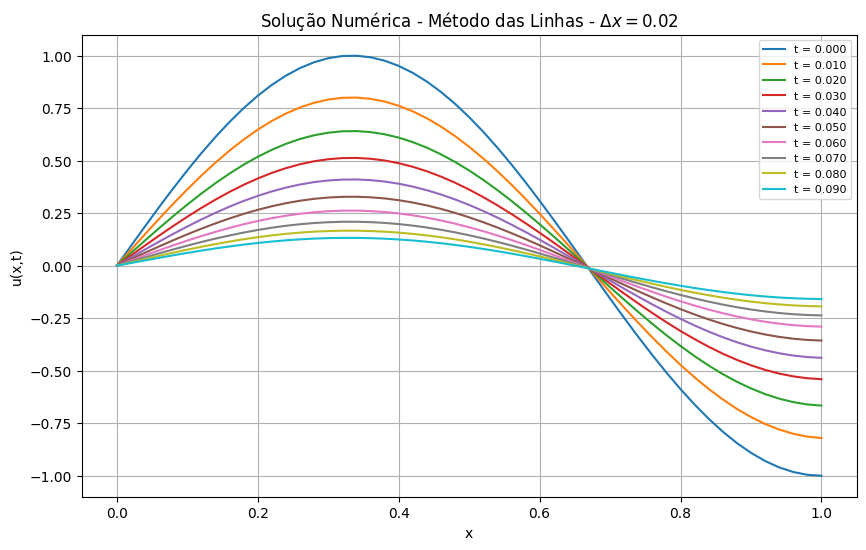

In [19]:
# Tempo de simulação
t_span = (0, 0.1)
t_eval = np.linspace(*t_span, 500)

# Resolver o sistema
sol = solve_ivp(heat_eq, t_span, u0, t_eval=t_eval, method='RK45')

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(0, len(t_eval), 50):  # Amostras no tempo
    ax.plot(x, sol.y[:, i], label=f"t = {t_eval[i]:.3f}")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.legend(loc='best', fontsize=8)
ax.set_title(r"Solução Numérica - Método das Linhas - $\Delta x = 0.02$")
ax.grid(True)

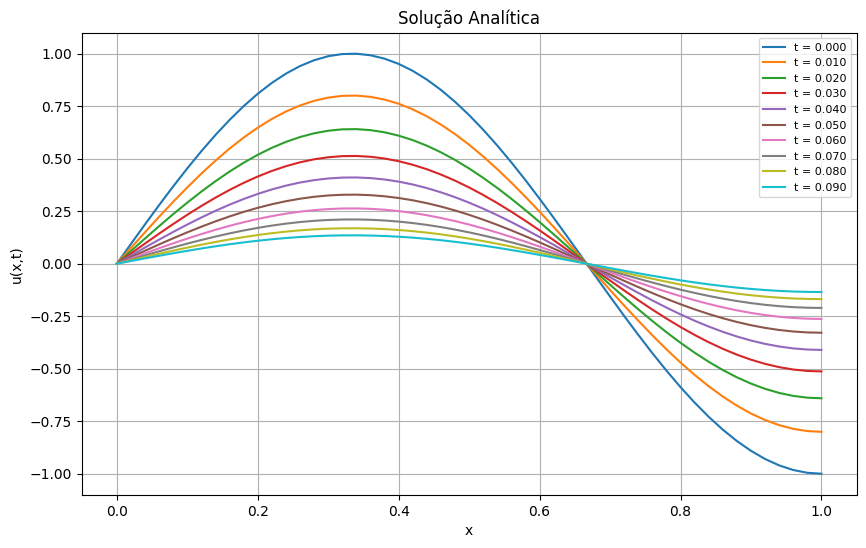

In [ ]:
# Solução analítica
mu = 3 * np.pi / 2
def analytical_solution(x, t):
    return np.sin(mu * x) * np.exp(-mu**2 * t)

plt.figure(figsize=(10, 6))
for i in range(0, len(t_eval), 50):  # Amostras no tempo
    plt.plot(x, analytical_solution(x, t_eval[i]), label=f"t = {t_eval[i]:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='best', fontsize=8)
plt.title("Solução Analítica")
plt.grid(True)
plt.show()